<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.

In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df_ConvertedComp = pd.read_sql_query(QUERY,conn)

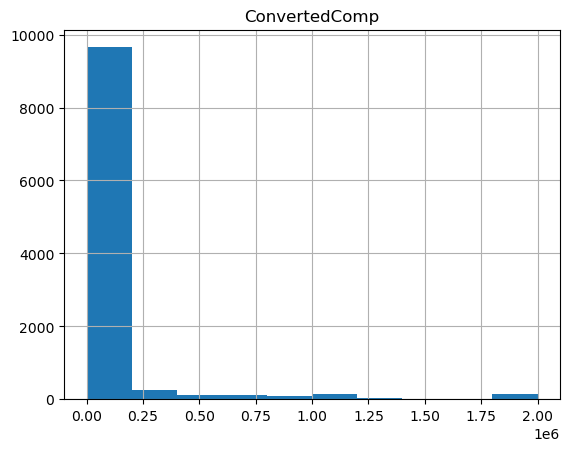

In [9]:
# your code goes here
hist = df_ConvertedComp.hist()

### Box Plots


Plot a box plot of `Age.`


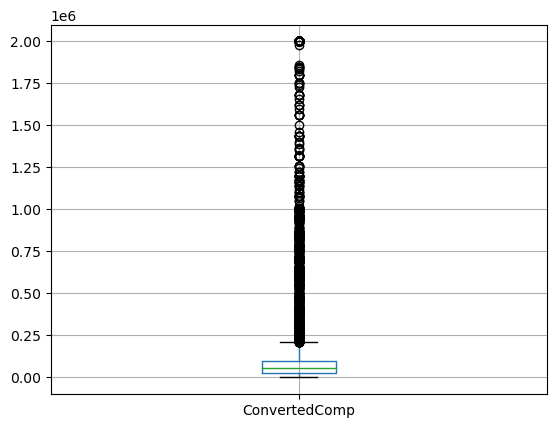

In [10]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df_age = pd.read_sql_query(QUERY,conn)

box = df_ConvertedComp.boxplot(grid=True)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


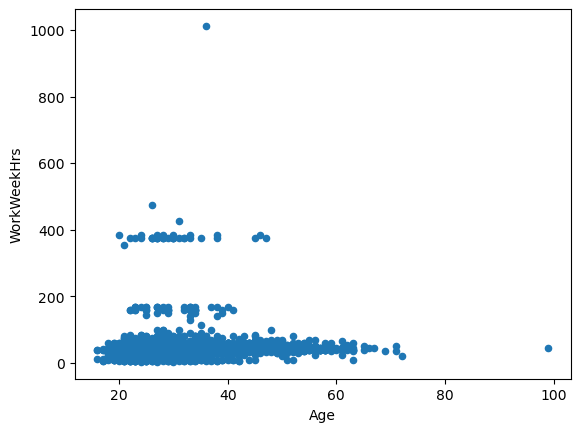

In [11]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df_age_hours = pd.read_sql_query(QUERY,conn)

box = df_age_hours.plot.scatter(x='Age', y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

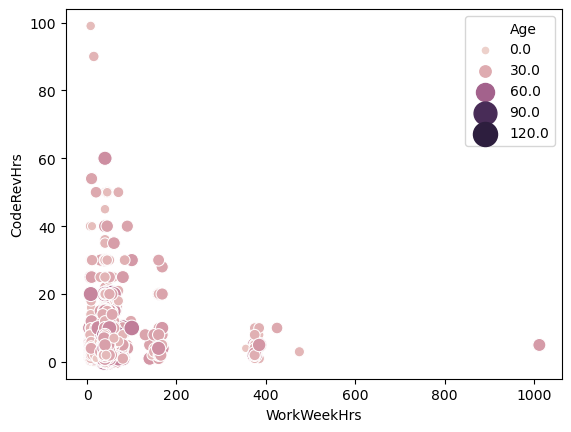

In [13]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df_hours_code_age = pd.read_sql_query(QUERY,conn)

bubble = sns.scatterplot(data=df_hours_code_age, x="WorkWeekHrs", y="CodeRevHrs", size="Age", sizes=(20,300), hue="Age")

**Removing outliers from 'WorkWeekHrs'**

Extreme values like 1000 or 400 hours per week are likely data entry errors or outliers that don't accurately represent typical working hours. Removing them improves the accuracy of the dataset.

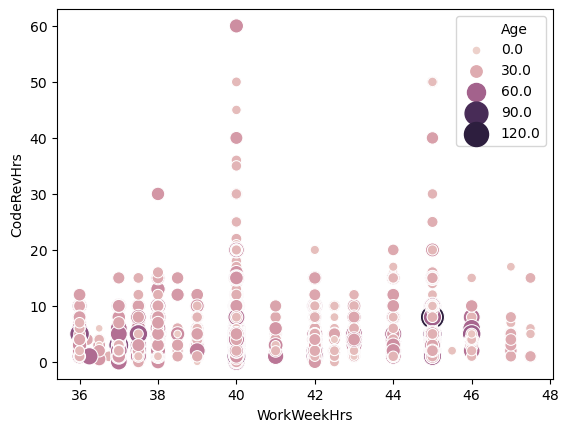

In [14]:
# Calculate quartiles for WorkWeekHrs
Q1_WorkWeekHrs = df_hours_code_age['WorkWeekHrs'].quantile(0.25)
Q3_WorkWeekHrs = df_hours_code_age['WorkWeekHrs'].quantile(0.75)
IQR_WorkWeekHrs = Q3_WorkWeekHrs - Q1_WorkWeekHrs

# Define lower and upper bounds for WorkWeekHrs
lower_bound_WorkWeekHrs = Q1_WorkWeekHrs - 1.5 * IQR_WorkWeekHrs
upper_bound_WorkWeekHrs = Q3_WorkWeekHrs + 1.5 * IQR_WorkWeekHrs

# Remove outliers
df_no_outliers = df_hours_code_age[
    (df_hours_code_age['WorkWeekHrs'] >= lower_bound_WorkWeekHrs) &
    (df_hours_code_age['WorkWeekHrs'] <= upper_bound_WorkWeekHrs)]

# Plot the bubble plot without outliers
bubble = sns.scatterplot(data=df_no_outliers, x="WorkWeekHrs", y="CodeRevHrs", size="Age", sizes=(20, 300), hue="Age")

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


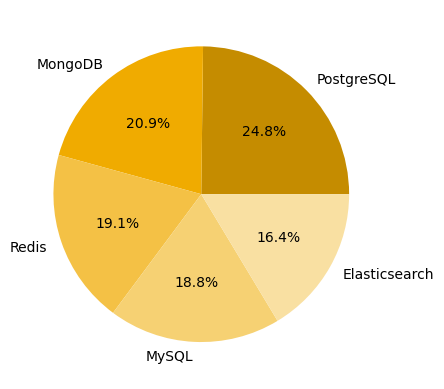

In [15]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS Total
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Total DESC
LIMIT 5
"""
df_database_wish = pd.read_sql_query(QUERY,conn)

colors = ["#C58C00","#F0AB00","#F4C145","#F6D173","#F9E0A2"]
pie_chart = plt.pie(df_database_wish["Total"], labels=df_database_wish["DatabaseDesireNextYear"], colors=colors, autopct='%1.1f%%')

**Question:**
How many respondents indicated that they currently work with 'SQL'? 

In [16]:
QUERY="""
SELECT LanguageWorkedWith, COUNT(Respondent)
FROM LanguageWorkedWith
WHERE LanguageWorkedWith='SQL'
"""

df_sql =pd.read_sql_query(QUERY,conn)
df_sql

,LanguageWorkedWith,COUNT(Respondent)
0,SQL,7106


**Question:** 
How many respondents indicated that they work on 'MySQL' only?

In [17]:
QUERY="""
SELECT DatabaseWorkedWith, COUNT(Respondent)
FROM DatabaseWorkedWith
GROUP BY Respondent 
HAVING COUNT(DatabaseWorkedWith)=1 AND DatabaseWorkedWith='MySQL'
"""

df_mysql_only =pd.read_sql_query(QUERY,conn)
len(df_mysql_only)

474

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


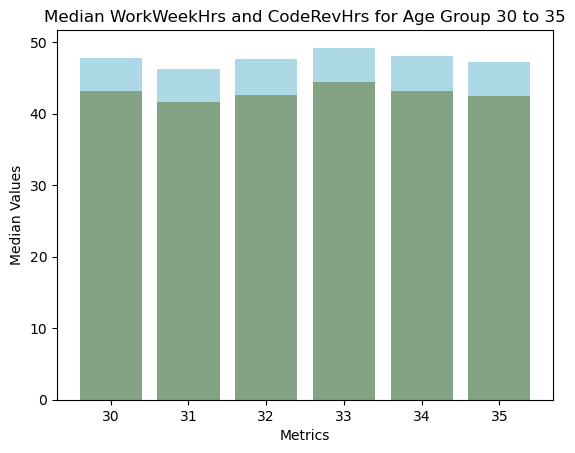

In [18]:
# your code goes here
QUERY = """
SELECT AVG(WorkWeekHrs), AVG(CodeRevHrs), Age 
FROM master 
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
"""

df_stacked = pd.read_sql_query(QUERY,conn)

workweek_median = df_stacked["AVG(WorkWeekHrs)"]
coderev_median = df_stacked["AVG(CodeRevHrs)"]
age = df_stacked["Age"]
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 

plt.bar(age, workweek_median, color=color)
plt.bar(age, coderev_median, bottom= workweek_median, color='lightblue')

plt.xlabel("Metrics")
plt.ylabel("Median Values")
plt.title("Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35")

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


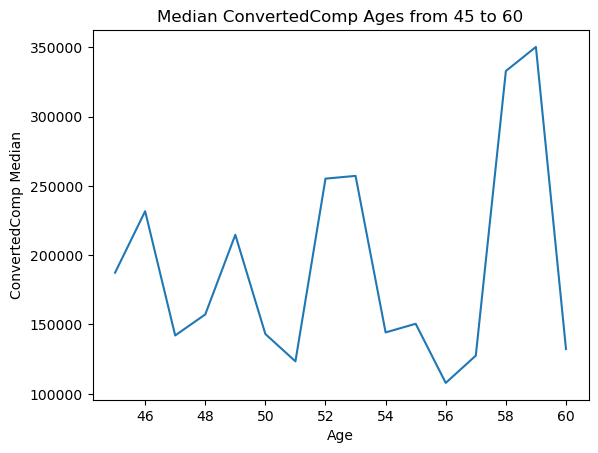

In [19]:
# your code goes here
QUERY = """
SELECT ConvertedComp, AVG(ConvertedComp),Age
FROM master
WHERE Age BETWEEN 45 AND 60
GROUP BY Age
"""

df_line = pd.read_sql_query(QUERY,conn)

plt.plot(df_line["Age"],df_line["AVG(ConvertedComp)"])

plt.xlabel('Age')
plt.ylabel('ConvertedComp Median')
plt.title('Median ConvertedComp Ages from 45 to 60')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


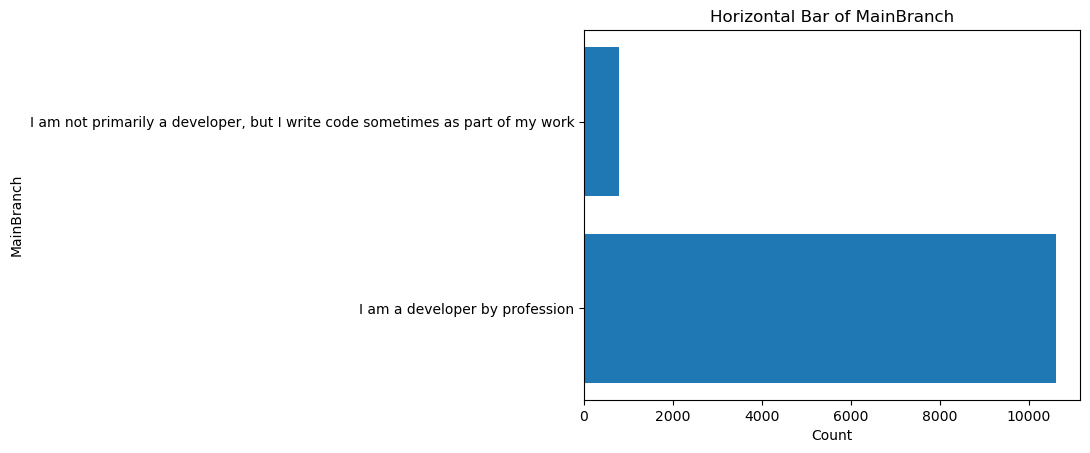

In [21]:
# your code goes here
QUERY = """
SELECT MainBranch, count(MainBranch)
FROM master
GROUP BY MainBranch
"""

df_bar = pd.read_sql_query(QUERY,conn)
df_bar

plt.barh(df_bar["MainBranch"], df_bar["count(MainBranch)"])

plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.title('Horizontal Bar of MainBranch')

plt.show()

Close the database connection.


In [23]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
